# Artificial Intelligence exam project

Initial imports:

In [13]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import time
from utils import *
from heuristic_GG import *
from heuristic_FD import *

In [14]:
des_file = """

MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center


MAP
||||||||||||||||||||
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
|..................|
||||||||||||||||||||
ENDMAP

REGION: (0,0,20,80), lit, "ordinary"
STAIR:(18, 18),down
BRANCH: (10,10,10,10),(11,11,11,11)
MONSTER: ('k', "kobold"), (1,1)
MONSTER: ('k', "kobold"), (16,9)
MONSTER: ('k', "kobold"), (14,7)
MONSTER: ('k', "kobold"), (1,9)
MONSTER: ('k', "kobold"), (10,17)


"""

In [15]:
env = gym.make("MiniHack-Navigation-Custom-v0", des_file=des_file, observation_keys=("chars", "pixel","blstats"))
state = env.reset()
env.render() 


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                              --------------------                              
                              |k.................|                              
                              |..................|                              
                              |..................|                              
                              |..................|                              
                              |..................|                              
                              |..................|                              
                              |.............k....|                              
                              |..................|                              
                              |k..............k..|                              
                           

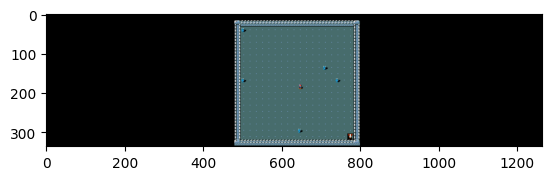

In [16]:
game_map = state['chars']
game = state['pixel']
plt.imshow(state['pixel'])

In [17]:
start = get_player_location(game_map)
end_target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", end_target)
print("Monster position:", get_monster_location(game_map))

Agent position: (11, 40)
Target position: (19, 48)
Monster position: [(2, 31), (8, 44), (10, 31), (10, 46), (18, 40)]


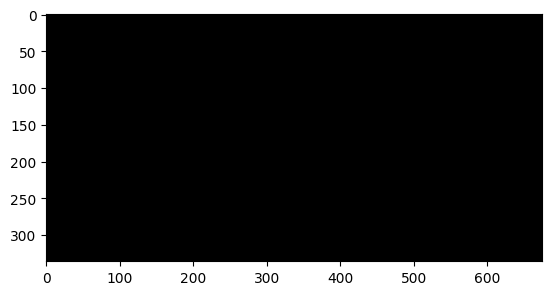

In [18]:
player_moves = [start]
image = plt.imshow(game[:, 300:975])

#finchè non arriviamo alla soluzione
end_state=False
hp=12
max_hp=12
while not end_state:
    current_position=get_player_location(game_map)
    coord=get_best_move(game_map, current_position, end_target, heuristic_gg, hp)
    print('hp_player: ', hp)

    #stampa e aggiornamento passo
    game_map, x, end_state, y = env.step(actions_from_path(current_position,[coord])[0])
    hp=game_map["blstats"][10]
    max_hp=game_map["blstats"][11]
    game_map=plot_map(game_map,image)
    player_moves.append(coord)
    
# lista passi effettuati
sol = actions_from_path(player_moves[0], player_moves[1:])

